<h2><u>Supervised Machine Learning</u></h2>

# Module 4 – Logistic Regression
# <h2> Demo : Logistic Regression in Python </h2>

**Scenario - Predicting Telecom Customer Churn using Logistic Regression**

> The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly referred as the percentage of service subscribers who discontinue their subscriptions within a given time period. 




*Simtel hires Data Scientist from Microsoft to understand why there is such a huge drop in Simtel customer base. Simtel requests the Data Scientist to come up with findings for why a customer leaves and what practises they can follow so  that it would immensely help the organization to strategize their retention initiatives manifold.*

**The process for the findings is divided into 6 stages:**


1. Data Preprocessing
2. Data Evaluation
3. Model Selection 
4. Model evaluation
5. Model Improvement
6. Future Predictions






In [ ]:
#Section A: Data Preprocessing

In [1]:


#Standard libraries for data analysis
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



In [2]:
!wget https://www.dropbox.com/s/u2gne1kssrii8gw/1260_m4_Logistic_Regression_csv.csv?dl=0

--2023-06-09 05:50:29--  https://www.dropbox.com/s/u2gne1kssrii8gw/1260_m4_Logistic_Regression_csv.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u2gne1kssrii8gw/1260_m4_Logistic_Regression_csv.csv [following]
--2023-06-09 05:50:30--  https://www.dropbox.com/s/raw/u2gne1kssrii8gw/1260_m4_Logistic_Regression_csv.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7b2d7b527dbe91dea0551b360.dl.dropboxusercontent.com/cd/0/inline/B9qeAnnDS1Zg1BrGuJcZ5Cam1v8_zMtpeaG29r9ONUjEvC-KJ3lXQMjnIXoNn1PDleKzwc-xw6MVRa4CnXNg86kfRG-UeXfhEjl1kEqgniBjwVIKsNsTLvAtE6EIes69ru6xoIA0M1AffrAPbqna_LckYpmp7JQP6NIAC83RRq8JvQ/file# [following]
--2023-06-09 05:50:30--  https://ucd7b2d7b527dbe91dea0551b360.dl.dropboxusercontent.com/cd/0/inline/B9qeAn

In [3]:
# Reading the dataset
dataset = pd.read_csv('/content/1260_m4_Logistic_Regression_csv.csv?dl=0')


In [4]:
# Evaluating Datastructure 

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Rechecking Column Datatypes and Missing Values
    
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [9]:
#Understanding the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
# Understanding Unique values in each categorical variable

dataset["PaymentMethod"].nunique()

dataset["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:

dataset["Contract"].nunique()

dataset["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
# Checking Target Variable Distribution  

dataset["Churn"].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

####**Inference- In this case, we have class imbalance with few negatives. In our business challenge, false negatives are costly. Hence let's keep an eye onto the Precision, Recall & F2 score besides accuracy**

In [14]:

#Cleaning the Dataset


dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")



In [15]:
#Pre-processing missing values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [17]:
# Finding the average and filling missing values of each columns programmatically.

na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [18]:
# Revalidating the Dataset
  
dataset.isna().any()  


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [19]:

# Performing Label Encoding the Binary data

# Creating a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))


6 columns were label encoded.


In [20]:
#Section B: Data Evaluation



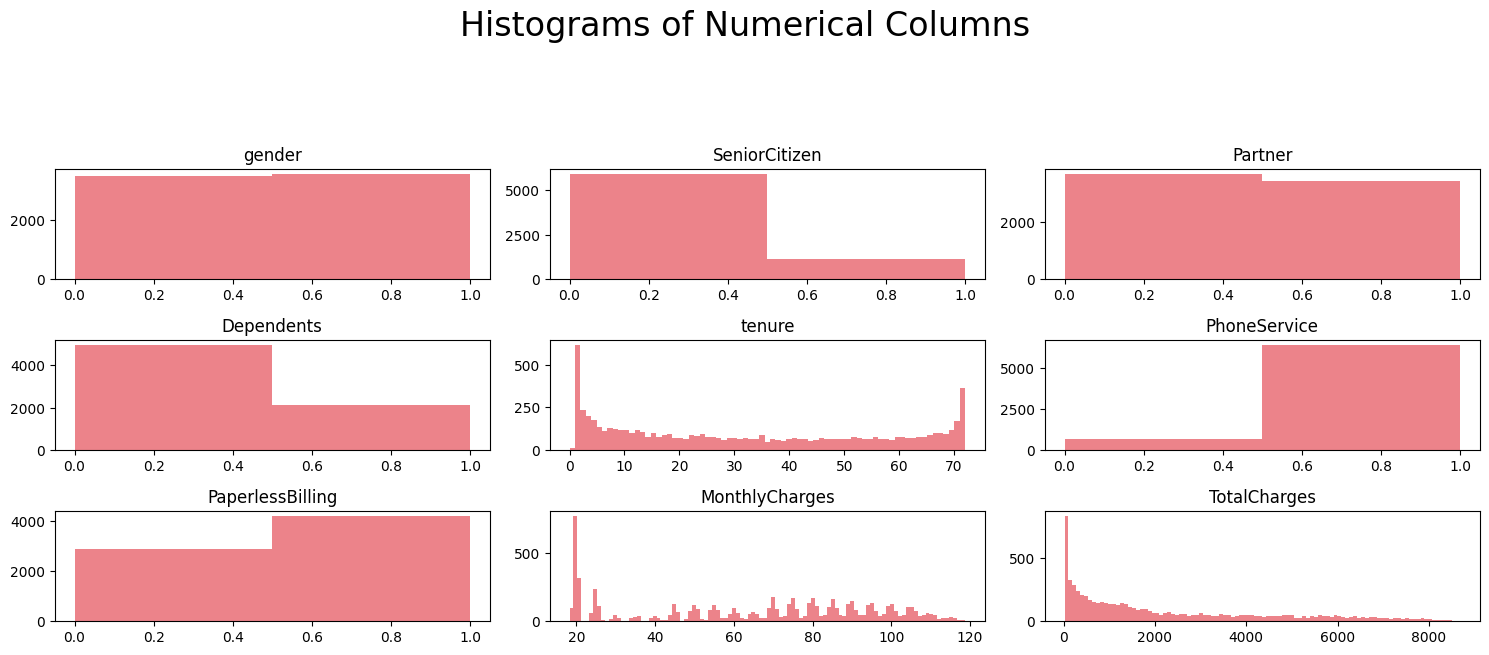

In [21]:

# Exploratory Data Analysis
  
# Plotting Histogram of numeric Columns to gain insights

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

# Histogram
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



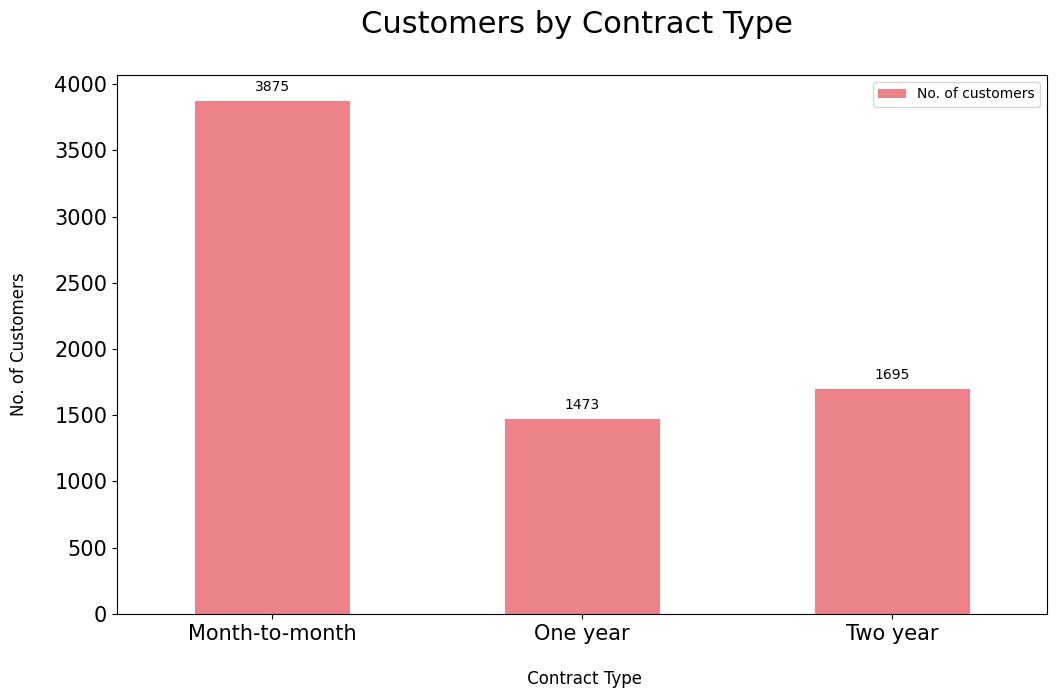

In [23]:

# Analyzing distribution of Key Categorical Variables
 
    
#(1) Distribution of Contract Type

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)


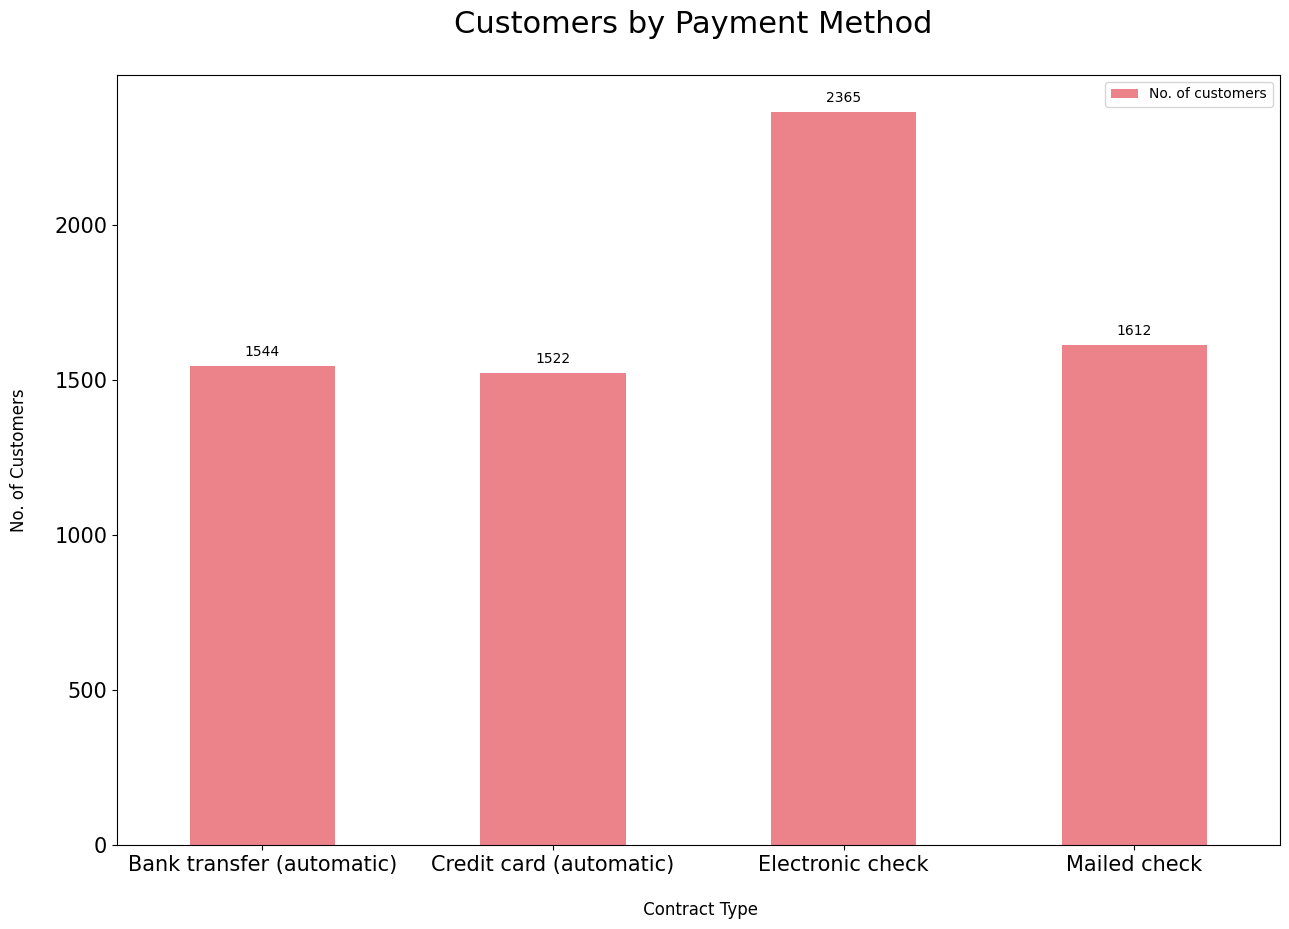

In [25]:

#(2) Distribution of Payment Method Type

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(15, 10), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)


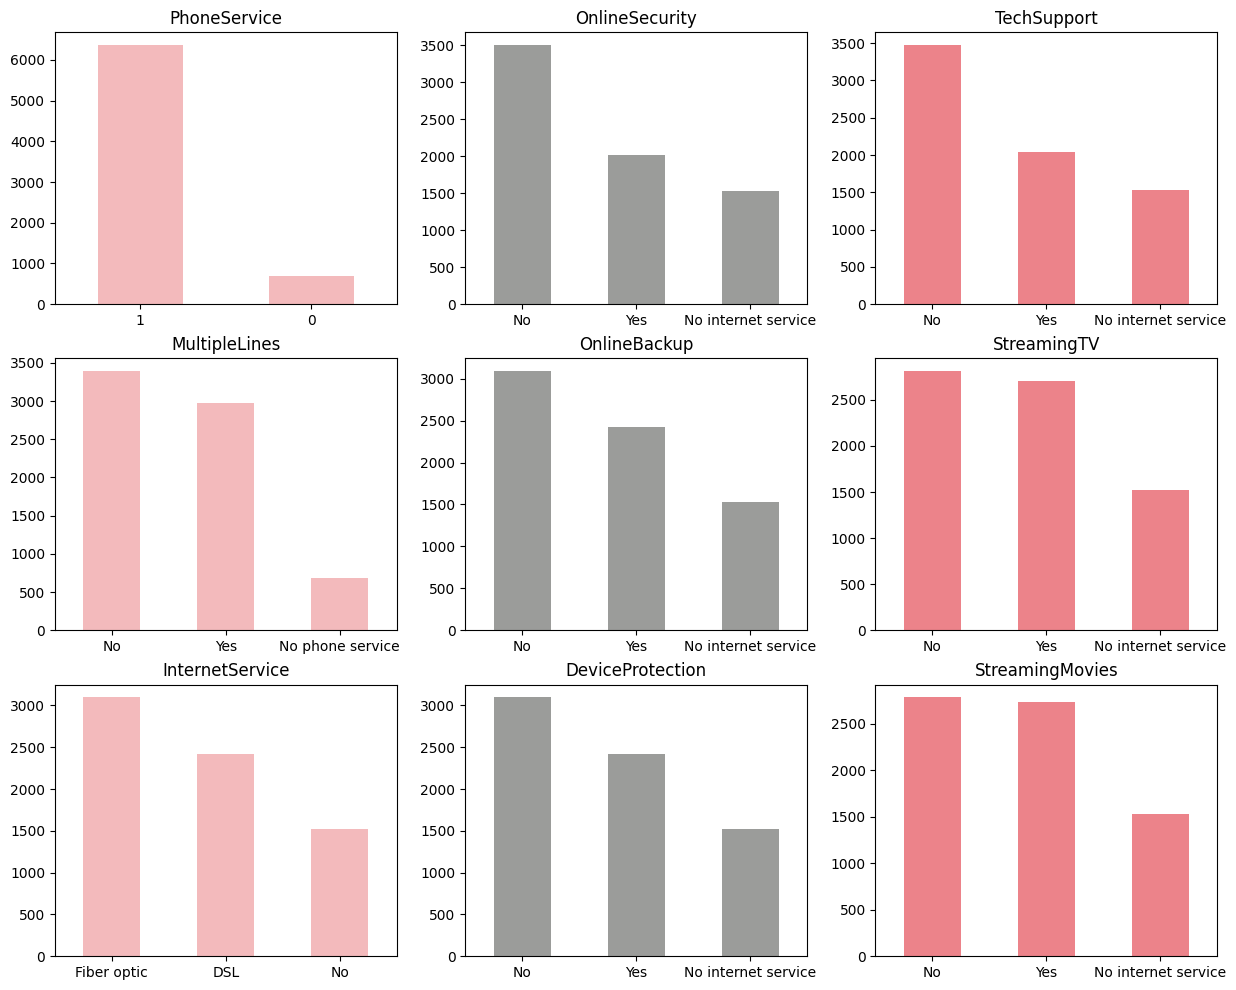

In [26]:

#(3) Distribution of various Label Encoded Categorical Variables

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)


<ipython-input-28-091440489b78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


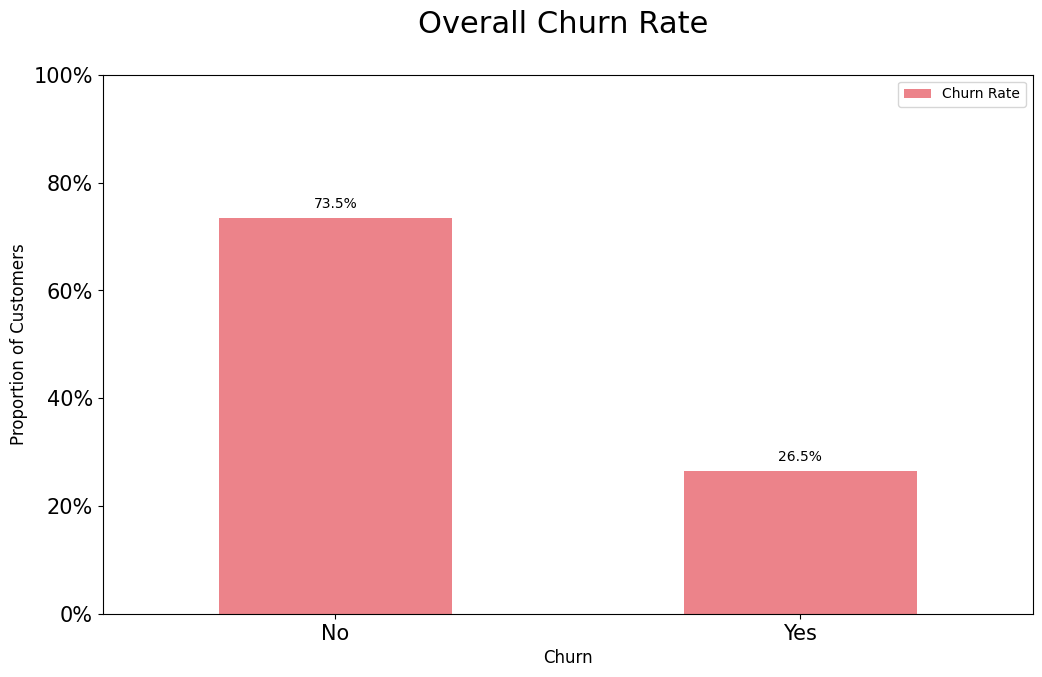

In [28]:
   
# Analyzing Churn Rate by Categorical variables:   

#(1) Overall Churn Rate

import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        
        label = "{:.1f}%".format(y_value)    
        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)                                                            
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)  


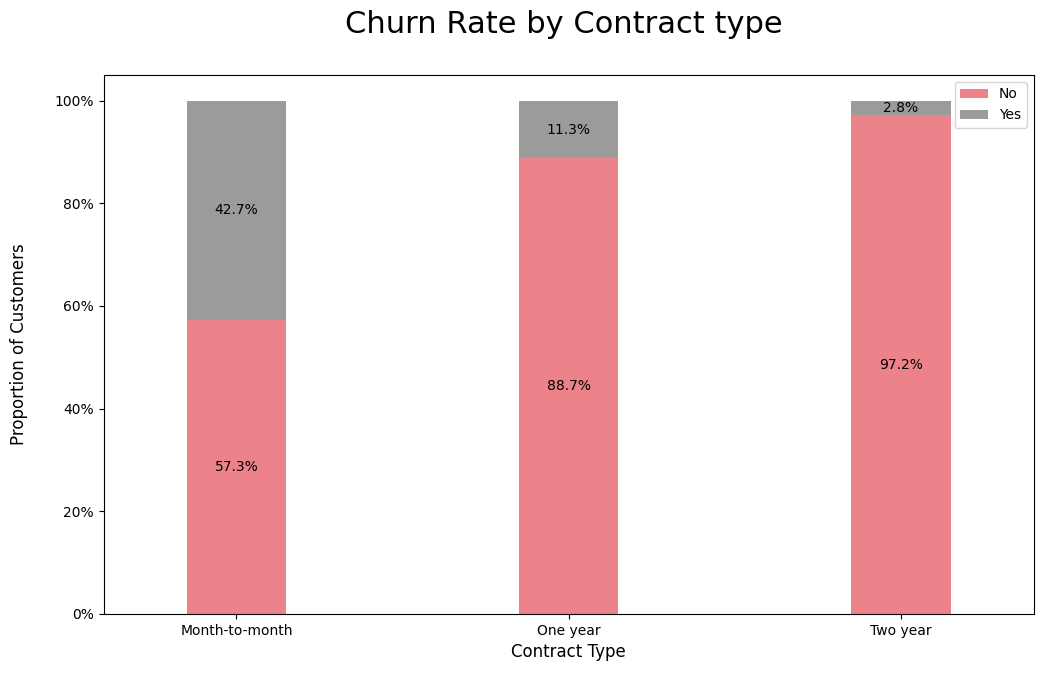

In [30]:

#(2) Churn Rate by Contract Type 


import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


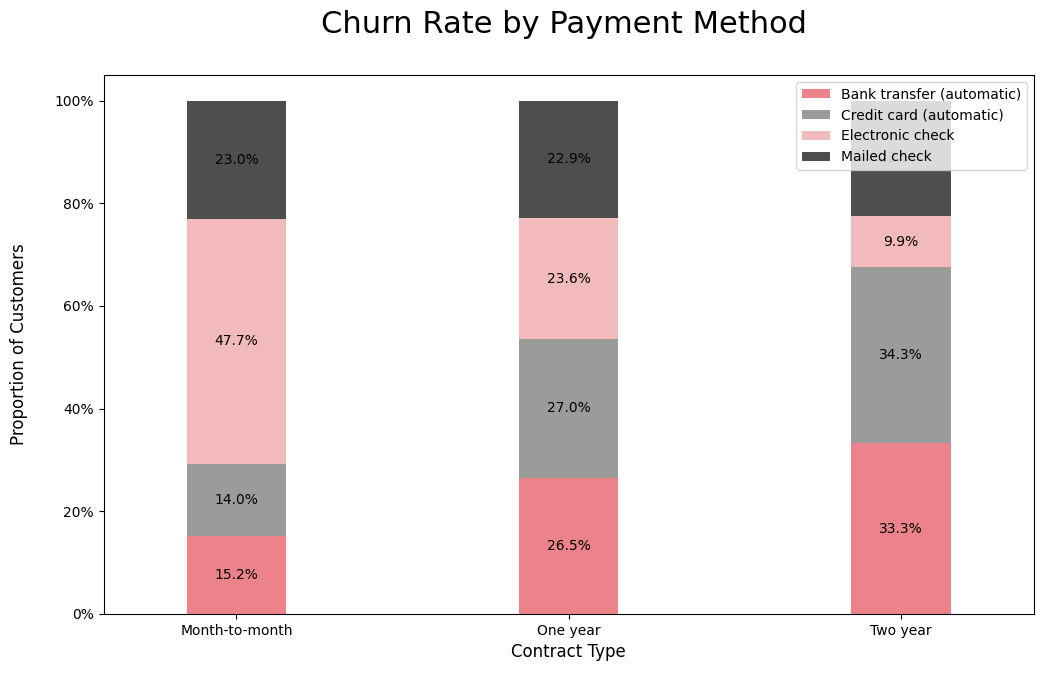

In [32]:


#(3) Churn Rate by Payment Method Type


import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False) 

In [33]:

# Finding positive and negative correlations with the Response Variable

dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

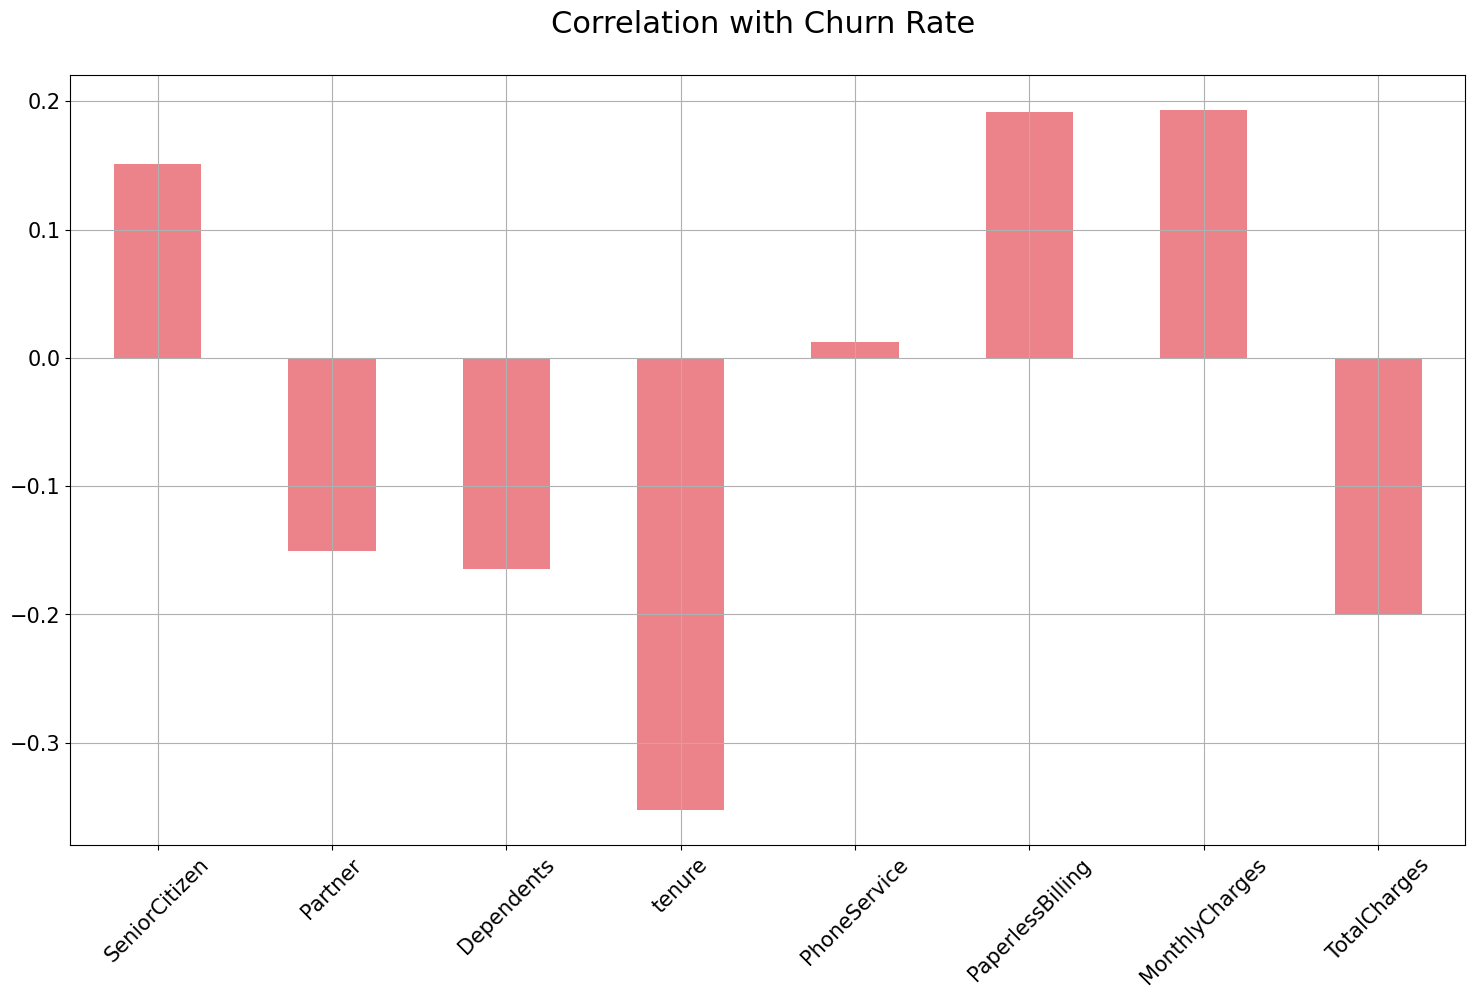

In [34]:

# Plotting positive & negative correlation with Response Variable

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


<Axes: >

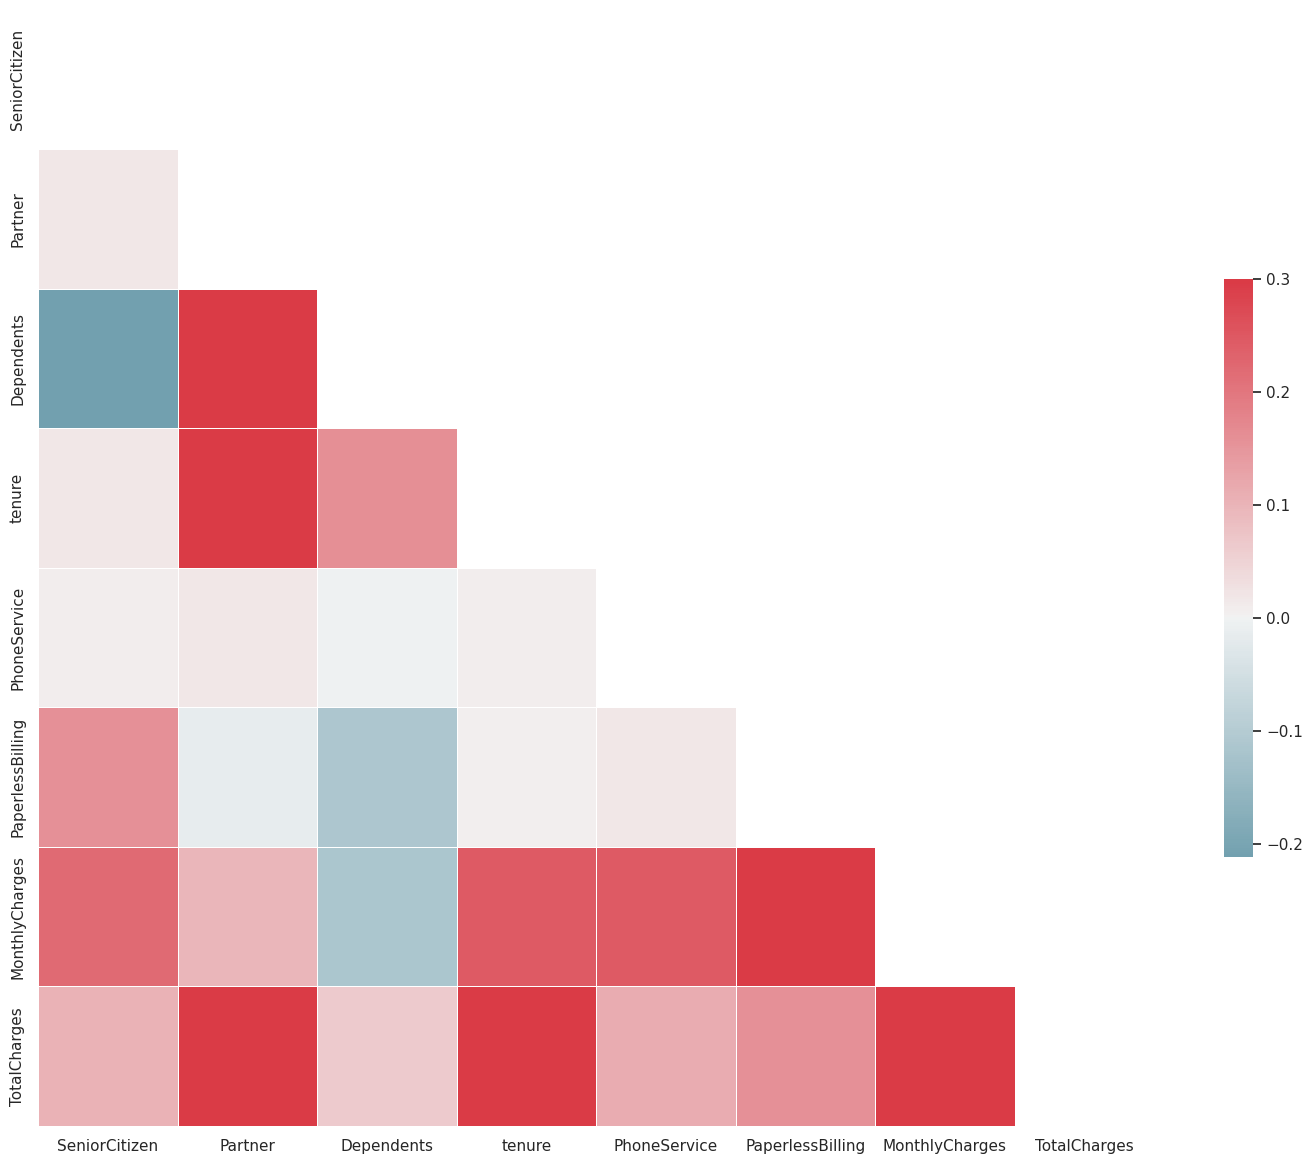

In [35]:


# Plot Correlation Matrix of all independent variables

## Set and compute the Correlation Matrix
sn.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [36]:


#Check Multicolinearity using VIF

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(dataset2)


,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


Text(0.5, 1.0, 'Co-linearity of Monthly Charges and Total Charges')

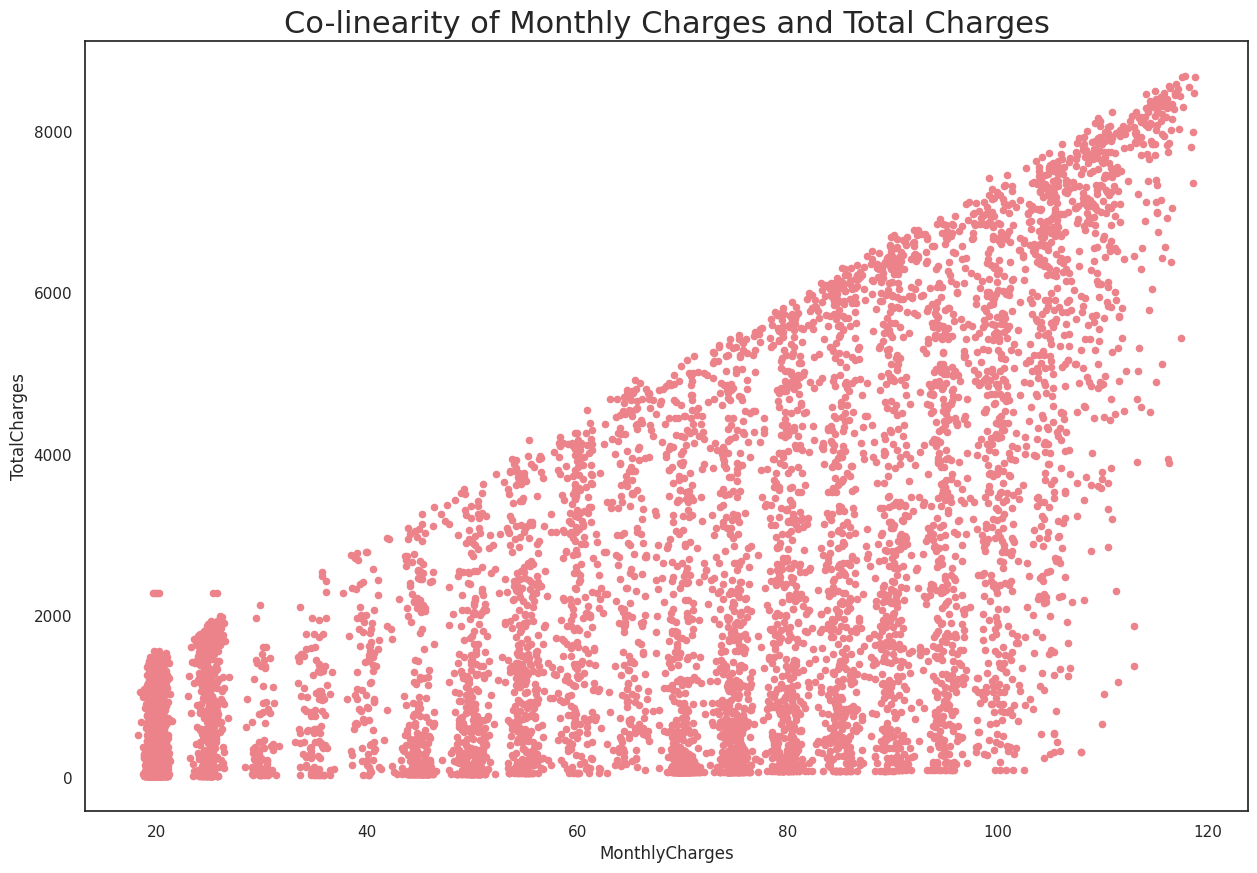

In [38]:
# Total Charges seem to be colinear with Monthly Charges.

# Checking colinearity
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x = 'MonthlyCharges',
                                                              y='TotalCharges', color =  '#ec838a')


plt.title('Co-linearity of Monthly Charges and Total Charges',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")



In [39]:

# Dropping TotalCharges:
    
dataset2 = dataset2.drop(columns = "TotalCharges")

# Revalidate Colinearity:

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(dataset2)


,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [40]:
# Applying changes in the main dataset:
    
dataset = dataset.drop(columns = "TotalCharges")  


In [41]:
# Encoding Categorical data

# Incase if user_id is an object:
    
identity = dataset["customerID"]

dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset (column concatenation)

dataset = pd.concat([dataset, identity], axis = 1)
 

In [42]:
# Splitting dataset into dependent and independent variables

# Identify response variable:
    
response = dataset["Churn"]

dataset = dataset.drop(columns="Churn")


In [43]:
# Generate training and test datasets of dependent and independent variables


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0) #to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


In [44]:

# Removing Identifiers

train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])



In [45]:
# Feature Scaling

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [46]:


#Section C: Model Selection



**Note:** Remove the "#", run the following command and restart the runtime to install pycaret library if it is not already installed on your runtime.

In [47]:
##Installing pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00


In [48]:
from pycaret.classification import *


In [50]:

#Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.12,1.65,74.6,1.26


**Note - Different algorithms can be used in this problem to understand how well which algorithm works**

In [51]:


#Compare Baseline Classification Algorithms - Second Iteration
#Using Accuracy, Precision, Recall, F1 and F2 Score Metrics



In [52]:

#Logistic Regression

# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])





In [53]:

#Visualize the results and compare the baseline algorithms


#Sorting results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)



results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.803407   0.652038  0.55615  0.600289  0.573003


In [ ]:

#Section D: Model Evaluation (Logistic Regression


In [54]:

#Train & evaluate Chosen Model
    
    
# Fitting Logistic Regression on the Training dataset:
    
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predicting the Test set results

y_pred = classifier.predict(X_test)


#Evaluating Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)


                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.803407   0.652038  0.55615  0.600289  0.573003


In [55]:

# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Logistic Regression Classifier Accuracy: 0.80 (+/- 0.04)


Text(0.5, 31.222222222222214, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

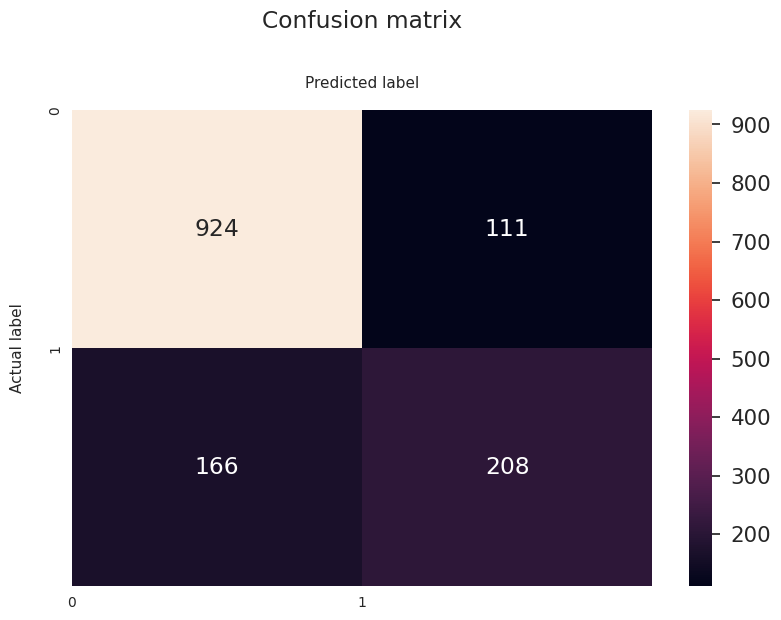

In [56]:


#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


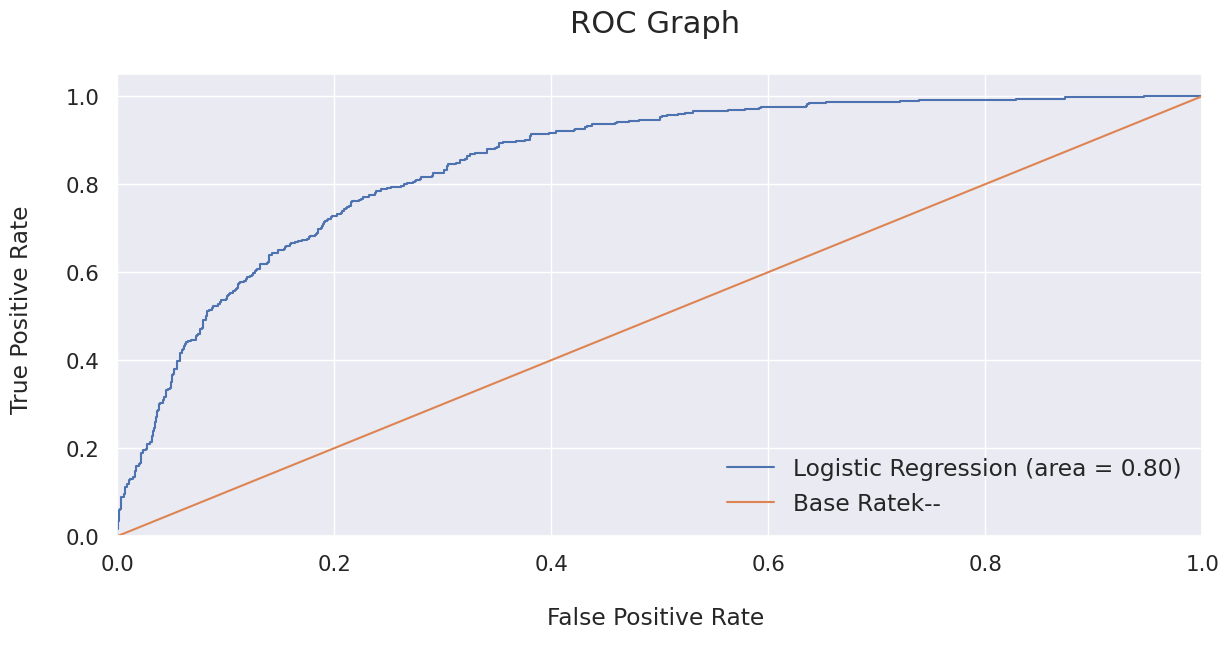

In [57]:
# Evaluating the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plotting Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


In [58]:

#Predicting Feature Importance
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


,features,coef
12,InternetService_Fiber optic,0.326867
32,Contract_Month-to-month,0.309004
6,PaperlessBilling,0.165872
28,StreamingTV_Yes,0.134275
31,StreamingMovies_Yes,0.131698
14,OnlineSecurity_No,0.118931
37,PaymentMethod_Electronic check,0.113855
23,TechSupport_No,0.095824
10,MultipleLines_Yes,0.090564
1,SeniorCitizen,0.079220


In [59]:


#Section E: Model Improvement (Logistic Regression)



In [60]:

#Hyper parameter Tuning  


# Round 1: 
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 6.90 seconds


(0.7190694189796186, {'C': 10, 'penalty': 'l2'})

In [61]:
# Round 2: 
    

# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 1.24 seconds


(0.7187968786541289, {'C': 0.05, 'penalty': 'l2'})

In [62]:
#Final tuning and selection 


lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [63]:


#Section F: Comparing Model Predictions against test set



In [64]:

#Comparing predictions against test set 


#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)


[[924 111]
 [166 208]]


In [65]:

#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])


PRED,0,1
ACTUAL,,
0,157,50
1,61,19


Test Data Accuracy: 0.8034


<Figure size 2800x2000 with 0 Axes>

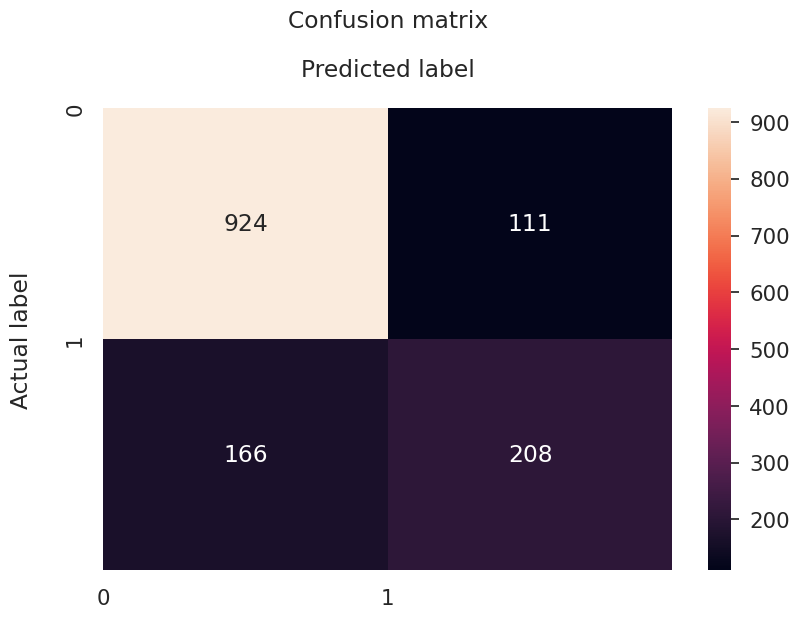

In [66]:

#visualizing Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



In [67]:

# Format Final Results:


final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["propensity_to_convert(%)"] = y_pred_probs 

final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)

      customerID  Churn  predictions  propensity_to_convert(%) Ranking
5532  8174-LNWMW      0            0                      1.94       9
5173  2480-SQIOB      0            0                     33.65       4
7010  0723-DRCLG      1            1                     79.61       1
6507  5708-EVONK      1            0                     18.62       5
5985  3585-YNADK      0            0                      4.15       8
...          ...    ...          ...                       ...     ...
3333  4573-JKNAE      0            0                      3.14       9
3053  0960-HUWBM      0            0                      6.46       7
6920  2595-KIWPV      0            0                      1.78       9
4696  9128-CPXKI      0            0                      9.64       7
2246  7181-BQYBV      1            1                     74.84       1

[1409 rows x 5 columns]


**Conclusion - Performed Logistic Regression Successfuly**